# Data Aggregation and Group Operations

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
pd.options.display.notebook_repr_html = False

In [3]:
%matplotlib inline

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## GroupBy mechanics

In [5]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randint(10, size=5),
                'data2' : np.random.randint(10, size=5)})
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [6]:
#df['data1']은 그냥 series
grouped = df['data1'].groupby(df['key1'])
grouped
grouped2 = df.data1.groupby(df.key1)
grouped2

In [7]:
#
df['data1']
df.data1
#df[['data1']]은 series 1개짜리인 dataframe임
df[['data1']].groupby(df.key1)

0    2
1    5
2    1
3    4
4    9
Name: data1, dtype: int32

0    2
1    5
2    1
3    4
4    9
Name: data1, dtype: int32

In [8]:
df['key1']
df.key1

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [9]:
grouped.mean()

key1
a    5.333333
b    2.500000
Name: data1, dtype: float64

In [10]:
[df.key1, df.key2]

[0    a
 1    a
 2    b
 3    b
 4    a
 Name: key1, dtype: object, 0    one
 1    two
 2    one
 3    two
 4    one
 Name: key2, dtype: object]

In [11]:
#group 기준되는 키가 df[key1], df[key2] series 2개임
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means2 = df.data1.groupby([df.key1, df.key2]).mean()
means
means2

key1  key2
a     one     5.5
      two     5.0
b     one     1.0
      two     4.0
Name: data1, dtype: float64

key1  key2
a     one     5.5
      two     5.0
b     one     1.0
      two     4.0
Name: data1, dtype: float64

In [12]:
#제일 마지막 인덱스가 col인덱스로 올라가게됨
means.unstack()

key2  one  two
key1          
a     5.5  5.0
b     1.0  4.0

In [13]:
df
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

California  2005    5
            2006    1
Ohio        2005    3
            2006    9
Name: data1, dtype: int32

In [14]:
df.groupby('key1').mean()

         data1     data2
key1                    
a     5.333333  2.666667
b     2.500000  3.500000

In [15]:
df.groupby(['key1', 'key2']).mean()

           data1  data2
key1 key2              
a    one     5.5    3.0
     two     5.0    2.0
b    one     1.0    1.0
     two     4.0    6.0

In [ ]:
#그룹별 갯수 집계
df.groupby(['key1', 'key2']).size()

### Iterating over groups

In [16]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
4      9      1    a  one
b
   data1  data2 key1 key2
2      1      1    b  one
3      4      6    b  two


In [17]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)
    print()

('a', 'one')
   data1  data2 key1 key2
0      2      5    a  one
4      9      1    a  one

('a', 'two')
   data1  data2 key1 key2
1      5      2    a  two

('b', 'one')
   data1  data2 key1 key2
2      1      1    b  one

('b', 'two')
   data1  data2 key1 key2
3      4      6    b  two



In [18]:
for k, group in df.groupby(['key1', 'key2']):
    print(k)
    print(group)
    print()

('a', 'one')
   data1  data2 key1 key2
0      2      5    a  one
4      9      1    a  one

('a', 'two')
   data1  data2 key1 key2
1      5      2    a  two

('b', 'one')
   data1  data2 key1 key2
2      1      1    b  one

('b', 'two')
   data1  data2 key1 key2
3      4      6    b  two



In [19]:
list(df.groupby('key1'))

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

In [ ]:
pieces = dict(list(df.groupby('key1')))
pieces
pieces['b']

In [20]:
df.groupby('key1')
list(df.groupby('key1'))
dict(list(df.groupby('key1')))

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

{'a':    data1  data2 key1 key2
 0      2      5    a  one
 1      5      2    a  two
 4      9      1    a  one, 'b':    data1  data2 key1 key2
 2      1      1    b  one
 3      4      6    b  two}

In [ ]:
dict(df.groupby('key1'))

In [ ]:
df.dtypes
type(df.dtypes)

In [ ]:
df
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

In [ ]:
s1 = df.dtypes[[3, 0, 1, 2]]; s1

In [ ]:
grouped2 = df.groupby(s1, axis=1)
df
dict(list(grouped))

### Selecting a column or subset of columns

In [ ]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [ ]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [ ]:
df.groupby(['key1', 'key2'])[['data2']].mean()

In [ ]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [ ]:
s_grouped.mean()

### Grouping with dicts and Series

In [22]:
people = DataFrame(np.random.randint(3, size=(5, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'],
                  )
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

   a    b    c  d  e
0  2  1.0  2.0  0  2
1  1  1.0  2.0  1  2
2  2  NaN  NaN  1  1
3  0  NaN  NaN  0  1
4  2  1.0  1.0  2  1

In [23]:
people = DataFrame(np.random.randint(3, size=(5, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis']
                  )
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

In [24]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'
          }
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [26]:
by_column = people.groupby(mapping, axis=1)
list(by_column)
by_column.sum()

[('blue',           c  d
  Joe     2.0  0
  Steve   0.0  2
  Wes     NaN  0
  Jim     2.0  1
  Travis  1.0  2), ('red',         a    b  e
  Joe     0  1.0  1
  Steve   0  2.0  0
  Wes     0  NaN  2
  Jim     0  0.0  2
  Travis  2  2.0  2)]

        blue  red
Joe      2.0  2.0
Steve    2.0  2.0
Wes      0.0  2.0
Jim      3.0  2.0
Travis   3.0  6.0

In [25]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [27]:
people.groupby(map_series, axis=1).count()
people.groupby(map_series, axis=1).sum()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

        blue  red
Joe      2.0  2.0
Steve    2.0  2.0
Wes      0.0  2.0
Jim      3.0  2.0
Travis   3.0  6.0

### Grouping with functions

In [28]:
people

people.groupby(len).sum()
people.T.groupby(len, axis=1).sum()

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

   a    b    c  d  e
3  0  1.0  4.0  1  5
5  0  2.0  0.0  2  0
6  2  2.0  1.0  2  2

     3    5    6
a  0.0  0.0  2.0
b  1.0  2.0  2.0
c  4.0  0.0  1.0
d  1.0  2.0  2.0
e  5.0  0.0  2.0

In [29]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

       a    b    c  d  e
3 one  0  1.0  2.0  0  1
  two  0  0.0  2.0  1  2
5 one  0  2.0  0.0  2  0
6 two  2  2.0  1.0  2  2

In [30]:
#people groupby 의 d열을 뜻한다.
people.groupby([len, 'd']).min()

     a    b    c  e
  d                
3 0  0  1.0  2.0  1
  1  0  0.0  2.0  2
5 2  0  2.0  0.0  0
6 2  2  2.0  1.0  2

### Grouping by index levels

In [31]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
columns
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

MultiIndex(levels=[['JP', 'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=['cty', 'tenor'])

cty          US                            JP          
tenor         1         3         5         1         3
0      1.808867 -1.105941  0.344533  1.553014  0.547801
1      0.256437 -1.512917 -0.878108 -0.017276 -0.136594
2     -0.730109  1.398268 -0.336922 -0.004680 -0.760234
3     -1.246113  0.278846 -0.473200 -1.742125 -0.968082

In [32]:
hier_df.groupby(level='cty', axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

## Data aggregation

In [34]:
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [41]:
#groupby는 null값이 아닌것의 갯수를 반환
#quantile이 0.5이면 중앙값을 구하라는 뜻임
grouped = df.groupby('key1')
grouped['data1'].quantile(0.5)
grouped.quantile(0.9)['data1']

key1
a    5.0
b    2.5
Name: data1, dtype: float64

key1
a    8.2
b    3.7
Name: data1, dtype: float64

In [42]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
list(grouped)
grouped.agg(peak_to_peak)    # alias for aggregate()
grouped.aggregate(peak_to_peak)

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

      data1  data2
key1              
a         7      4
b         3      5

      data1  data2
key1              
a         7      4
b         3      5

In [43]:
grouped.describe()

     data1                                                data2            \
     count      mean       std  min   25%  50%   75%  max count      mean   
key1                                                                        
a      3.0  5.333333  3.511885  2.0  3.50  5.0  7.00  9.0   3.0  2.666667   
b      2.0  2.500000  2.121320  1.0  1.75  2.5  3.25  4.0   2.0  3.500000   

                                           
           std  min   25%  50%   75%  max  
key1                                       
a     2.081666  1.0  1.50  2.0  3.50  5.0  
b     3.535534  1.0  2.25  3.5  4.75  6.0  

In [44]:
tips = pd.read_csv('ch08/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240

### Column-wise and multiple function application

In [48]:
grouped = tips.groupby(['sex', 'smoker'])
for (sex, smoker), group in grouped:
    #알파벳 특성상 F가 M보다 앞에 있으므로 Female이 먼저 나옴
    print(sex, smoker)
    print(group)

Female No
     total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
14        14.83  3.02  Female     No   Sun  Dinner     2  0.203641
16        10.33  1.67  Female     No   Sun  Dinner     3  0.161665
18        16.97  3.50  Female     No   Sun  Dinner     3  0.206246
21        20.29  2.75  Female     No   Sat  Dinner     2  0.135535
22        15.77  2.23  Female     No   Sat  Dinner     2  0.141408
29        19.65  3.00  Female     No   Sat  Dinner     2  0.152672
32        15.06  3.00  Female     No   Sat  Dinner     2  0.199203
33        20.69  2.45  Female     No   Sat  Dinner     4  0.118415
37        16.93  3.07  Female     No   Sat  Dinner     3  0.181335
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
52        34.81  5.20  Female     No   Sun  Dinner  

In [49]:
grouped_pct = grouped['tip_pct']
grouped['tip_pct'].mean()
#mean을 쓸 때, 작은따옴표''를 써줘야함
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [50]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [51]:
#mean함수의 결과를 여기에 쓰는데 그 이름은 foo로 쓰고, np.std의 이름은 bar라고 쓰겠다. 
#그 컬럼과 컬럼에 적용될 함수를 ...??
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

                    foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [52]:
#함수의 이름을 
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [ ]:
result['tip_pct']

In [ ]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

In [53]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [ ]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

### Returning aggregated data in "unindexed" form

In [ ]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

## 여성 비흡연자/흡연자, 남성 비흡연자/흡연자 별 평균 팁 비율을 막대그래프로, 여성/남성 흡연/비흡연자의 음식값과 팁 비율에 대한 산포도로 나타내 보세요

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

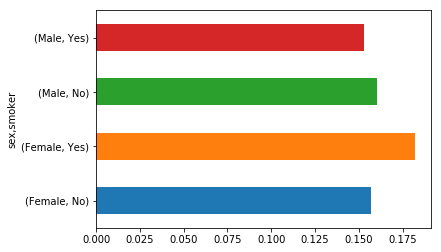

In [55]:
#grouped_pct.mean().plot(kind='bar')
tips.groupby(['sex', 'smoker'])['tip_pct'].mean().plot(kind='barh')

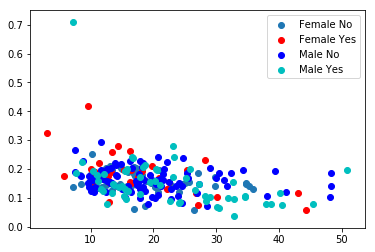

In [56]:
tip_f = tips[tips['sex'] == 'Female']
tip_fn = tip_f[tip_f['smoker'] == 'No']
tip_fy = tip_f[tip_f['smoker'] == 'Yes']
tip_m = tips[tips['sex'] == 'Male']
tip_mn = tip_m[tip_m['smoker'] == 'No']
tip_my = tip_m[tip_m['smoker'] == 'Yes']

plt.scatter(tip_fn['total_bill'], tip_fn['tip_pct'], label='Female No');
plt.scatter(tip_fy['total_bill'], tip_fy['tip_pct'], label='Female Yes', color='r');
plt.scatter(tip_mn['total_bill'], tip_mn['tip_pct'], label='Male No', color='b');
plt.scatter(tip_my['total_bill'], tip_my['tip_pct'], label='Male Yes', color='c');
plt.legend(loc='best');

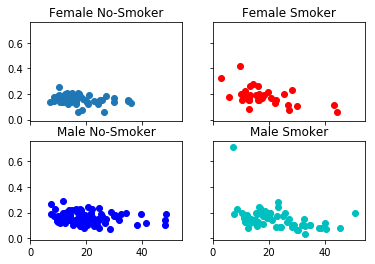

In [57]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes = axes.flatten()

tip_f = tips[tips['sex'] == 'Female']
tip_fn = tip_f[tip_f['smoker'] == 'No']
tip_fy = tip_f[tip_f['smoker'] == 'Yes']
tip_m = tips[tips['sex'] == 'Male']
tip_mn = tip_m[tip_m['smoker'] == 'No']
tip_my = tip_m[tip_m['smoker'] == 'Yes']

axes[0].set_title('Female No-Smoker')
axes[0].scatter(tip_fn['total_bill'], tip_fn['tip_pct'], label='Female No');
axes[1].set_title('Female Smoker')
axes[1].scatter(tip_fy['total_bill'], tip_fy['tip_pct'], label='Female Yes', color='r');
axes[2].set_title('Male No-Smoker')
axes[2].scatter(tip_mn['total_bill'], tip_mn['tip_pct'], label='Male No', color='b');
axes[3].set_title('Male Smoker')
axes[3].scatter(tip_my['total_bill'], tip_my['tip_pct'], label='Male Yes', color='c');

## Group-wise operations and transformations

In [58]:
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [59]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

      mean_data1  mean_data2
key1                        
a       5.333333    2.666667
b       2.500000    3.500000

In [60]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

   data1  data2 key1 key2  mean_data1  mean_data2
0      2      5    a  one    5.333333    2.666667
1      5      2    a  two    5.333333    2.666667
4      9      1    a  one    5.333333    2.666667
2      1      1    b  one    2.500000    3.500000
3      4      6    b  two    2.500000    3.500000

In [61]:
people

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

In [62]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

            a    b    c         d         e
one  0.666667  1.5  1.5  0.666667  1.666667
two  0.000000  1.0  1.0  1.500000  1.000000

In [63]:
list(people.groupby(key))
people.groupby(key).transform(np.mean)

[('one',         a    b    c  d  e
  Joe     0  1.0  2.0  0  1
  Wes     0  NaN  NaN  0  2
  Travis  2  2.0  1.0  2  2), ('two',        a    b    c  d  e
  Steve  0  2.0  0.0  2  0
  Jim    0  0.0  2.0  1  2)]

               a    b    c         d         e
Joe     0.666667  1.5  1.5  0.666667  1.666667
Steve   0.000000  1.0  1.0  1.500000  1.000000
Wes     0.666667  1.5  1.5  0.666667  1.666667
Jim     0.000000  1.0  1.0  1.500000  1.000000
Travis  0.666667  1.5  1.5  0.666667  1.666667

In [64]:
#위의 people.groupby(key).transform(np.mean) 에서 list(people.groupby(key))를 뺀 결과.
def demean(arr):
    return arr - arr.mean()
demeaned = people.groupby(key).transform(demean)
demeaned

               a    b    c         d         e
Joe    -0.666667 -0.5  0.5 -0.666667 -0.666667
Steve   0.000000  1.0 -1.0  0.500000 -1.000000
Wes    -0.666667  NaN  NaN -0.666667  0.333333
Jim     0.000000 -1.0  1.0 -0.500000  1.000000
Travis  1.333333  0.5 -0.5  1.333333  0.333333

In [65]:
demeaned.groupby(key).mean()

                a    b    c             d             e
one  7.401487e-17  0.0  0.0  7.401487e-17 -7.401487e-17
two  0.000000e+00  0.0  0.0  0.000000e+00  0.000000e+00

### Apply: General split-apply-combine

In [66]:
#df.sort_values
tips[:10]
def top(df, n=5, column='tip_pct'):
    #return df.sort_index(by=column)[-n:]
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240
6        8.77  2.00    Male     No  Sun  Dinner     2  0.228050
7       26.88  3.12    Male     No  Sun  Dinner     4  0.116071
8       15.04  1.96    Male     No  Sun  Dinner     2  0.130319
9       14.78  3.23    Male     No  Sun  Dinner     2  0.218539

     total_bill   tip     sex smoker  day    time  size   tip_pct
109       14.31  4.00  Female    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39    Male     No  Sat  Dinner     2  0.291990
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345

In [67]:
#top은 top5명을 나타냄
#apply는 top 등의 그룹 내부의 특수연산을 의미함. 위에서는 정의한 함수를 apply 파라미터로 사용함
tips.groupby('smoker').apply(top)

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [68]:
#여기서 n은 top n, column은 기준열을 뜻함
tips.groupby(['smoker', 'day']).apply(top, n=2, column='total_bill')
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  91        22.49   3.50    Male     No   Fri  Dinner     2   
            94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  59        48.27   6.73    Male     No   Sat  Dinner     4   
            212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  112       38.07   4.00    Male     No   Sun  Dinner     3   
            156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 85        34.83   5.17  Female     No  Thur   Lunch     4   
            142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  90        28.97   3.00    Male    Yes   Fri  Dinner     2   
            95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  102       44.30   2.50  Female    Yes   Sat  Dinner     3   
            170       50.81  10.00    Male    Yes  

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [69]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

In [ ]:
result.unstack('smoker')

In [70]:
# tips.groupby('smoker')['tip_pct'].describe()는 내부적으로 아래와 같이 수행된다.
f = lambda x: x.describe()
tips.groupby('smoker')['tip_pct'].apply(f).unstack()

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

#### Suppressing the group keys

In [71]:
tips.groupby('smoker', group_keys=False).apply(top)

     total_bill   tip     sex smoker   day    time  size   tip_pct
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

### Quantile and bucket analysis

In [75]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
#cut은 프레임을 n등분함. 즉, 아래는 data1을 4등분한거임
factor = pd.cut(frame.data1, 4)
frame.data1.describe()

count    1000.000000
mean        0.019794
std         1.012016
min        -2.947150
25%        -0.674904
50%        -0.027968
75%         0.684802
max         3.183761
Name: data1, dtype: float64

In [76]:
factor[:10]

0     (0.118, 1.651]
1    (-1.414, 0.118]
2    (-1.414, 0.118]
3     (0.118, 1.651]
4    (-1.414, 0.118]
5     (0.118, 1.651]
6     (0.118, 1.651]
7     (0.118, 1.651]
8    (-1.414, 0.118]
9    (-1.414, 0.118]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.953, -1.414] < (-1.414, 0.118] < (0.118, 1.651] < (1.651, 3.184]]

In [77]:
type(factor)

pandas.core.series.Series

In [ ]:
frame[:10]

In [78]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.groups

{Interval(-2.9529999999999998, -1.4139999999999999, closed='right'): Int64Index([ 12,  14,  24,  31,  89,  96, 104, 117, 143, 146, 157, 173, 174,
             177, 189, 194, 236, 257, 290, 315, 317, 318, 320, 340, 355, 357,
             368, 392, 393, 401, 406, 464, 469, 481, 493, 497, 505, 514, 529,
             535, 573, 583, 626, 642, 648, 690, 719, 733, 736, 745, 770, 790,
             816, 839, 842, 847, 860, 866, 872, 906, 910, 968, 980, 983, 984,
             989, 997],
            dtype='int64'),
 Interval(-1.4139999999999999, 0.11799999999999999, closed='right'): Int64Index([  1,   2,   4,   8,   9,  10,  13,  15,  18,  19,
             ...
             973, 981, 982, 990, 991, 993, 994, 996, 998, 999],
            dtype='int64', length=485),
 Interval(0.11799999999999999, 1.651, closed='right'): Int64Index([  0,   3,   5,   6,   7,  11,  17,  21,  28,  29,
             ...
             974, 976, 977, 978, 979, 986, 987, 988, 992, 995],
            dtype='int64', length=389),


In [79]:
#data1 그룹의 데이터를 가져와서 data2에 그대로 적용한결과임
#ex. 학교에서 학년별로 학부모들의 나이를 구하게되는 경우.
grouped.apply(get_stats)
grouped.apply(get_stats).unstack()


#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

data1                  
(-2.953, -1.414]  count     67.000000
                  max        2.397257
                  mean       0.013562
                  min       -1.992829
(-1.414, 0.118]   count    485.000000
                  max        3.024318
                  mean      -0.028943
                  min       -2.550980
(0.118, 1.651]    count    389.000000
                  max        2.527827
                  mean       0.008473
                  min       -2.966362
(1.651, 3.184]    count     59.000000
                  max        2.006008
                  mean      -0.098849
                  min       -2.148584
Name: data2, dtype: float64

                  count       max      mean       min
data1                                                
(-2.953, -1.414]   67.0  2.397257  0.013562 -1.992829
(-1.414, 0.118]   485.0  3.024318 -0.028943 -2.550980
(0.118, 1.651]    389.0  2.527827  0.008473 -2.966362
(1.651, 3.184]     59.0  2.006008 -0.098849 -2.148584

In [80]:
# Return quantile numbers
#qcut은 동일하게 10개의 구간으로 나누는 것이 아니라, 비율에따라 10개의 구간으로 나누게 됨.
grouping = pd.qcut(frame.data1, 10, labels=False)
grouping

0      5
1      5
2      0
3      6
4      4
5      9
6      9
7      7
8      3
9      1
10     4
11     7
12     0
13     1
14     0
15     2
16     9
17     7
18     2
19     1
20     1
21     6
22     2
23     3
24     0
25     5
26     1
27     1
28     5
29     7
      ..
970    3
971    6
972    6
973    5
974    5
975    9
976    9
977    8
978    7
979    8
980    0
981    4
982    3
983    0
984    0
985    9
986    8
987    5
988    6
989    0
990    2
991    1
992    5
993    5
994    4
995    8
996    4
997    0
998    1
999    1
Name: data1, Length: 1000, dtype: int64

In [ ]:
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

### Example: Filling missing values with group-specific values

In [81]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s
df = DataFrame(s)
df

0         NaN
1    1.194834
2         NaN
3    1.944937
4         NaN
5   -0.436918
dtype: float64

          0
0       NaN
1  1.194834
2       NaN
3  1.944937
4       NaN
5 -0.436918

In [82]:
#fillna는 frame의 nan을 특정 값으로 채운다.
s.fillna(s.mean())
df.fillna(df.mean())

0    0.900951
1    1.194834
2    0.900951
3    1.944937
4    0.900951
5   -0.436918
dtype: float64

          0
0  0.900951
1  1.194834
2  0.900951
3  1.944937
4  0.900951
5 -0.436918

In [84]:
['헬로']*3 + ['안녕']

['헬로', '헬로', '헬로', '안녕']

In [85]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
group_key

Ohio          1.218811
New York      0.480898
Vermont            NaN
Florida       2.027832
Oregon       -0.012670
Nevada             NaN
California    0.117995
Idaho              NaN
dtype: float64

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [86]:
np.array(group_key) == 'East'

array([ True,  True,  True,  True, False, False, False, False], dtype=bool)

In [ ]:
data[np.array(group_key) == 'East']

In [87]:
data.groupby(group_key).mean()

East    1.242514
West    0.052663
dtype: float64

In [88]:
#lambda는 값대입시에 선언해서 쓸 수 있는 함수임. 함수의 성격을 갖지만 일반 함수와는 조금 다름
fill_mean = lambda g: g.fillna(g.mean())
def fill_mean2(g):
    return g.fillna(g.mean)
list(data.groupby(group_key))
data.groupby(group_key).apply(fill_mean) 
data.groupby(group_key).transform(fill_mean)
data.groupby(group_key).apply(lambda g: g.fillna(g.mean()))

[('East', Ohio        1.218811
  New York    0.480898
  Vermont          NaN
  Florida     2.027832
  dtype: float64), ('West', Oregon       -0.012670
  Nevada             NaN
  California    0.117995
  Idaho              NaN
  dtype: float64)]

Ohio          1.218811
New York      0.480898
Vermont       1.242514
Florida       2.027832
Oregon       -0.012670
Nevada        0.052663
California    0.117995
Idaho         0.052663
dtype: float64

Ohio          1.218811
New York      0.480898
Vermont       1.242514
Florida       2.027832
Oregon       -0.012670
Nevada        0.052663
California    0.117995
Idaho         0.052663
dtype: float64

Ohio          1.218811
New York      0.480898
Vermont       1.242514
Florida       2.027832
Oregon       -0.012670
Nevada        0.052663
California    0.117995
Idaho         0.052663
dtype: float64

In [89]:
data.groupby(group_key).groups

{'East': Index(['Ohio', 'New York', 'Vermont', 'Florida'], dtype='object'),
 'West': Index(['Oregon', 'Nevada', 'California', 'Idaho'], dtype='object')}

In [ ]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
def fill_func(g):
    return g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

In [ ]:
data.groupby(group_key)

In [ ]:
s1 = Series(np.arange(5)); s1
s2 = Series(np.arange(5), name='test'); s2
s1.name
s2.name

In [ ]:
Series(data.groupby(group_key).groups['East'], name='East').name

### Example: Random sampling and permutation

In [90]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
#card_val = (range(1, 11) + [10] * 3) * 4
card_val = (list(range(1, 11)) + [10]*3) * 4
#base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)

In [91]:
card_val[:20]
base_names
deck[:13]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7]

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [93]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
    #return deck[(np.random.permutation(len(deck))[:n])]  # fancy-indexing
draw(deck)

3C      3
2S      2
10C    10
10H    10
4D      4
dtype: int64

In [ ]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
# alternatively
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Example: Group weighted average and correlation

In [ ]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
grouped.aggregate(get_wavg)

In [ ]:
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

In [ ]:
close_px[-4:]

In [ ]:
dd = Series(np.random.randint(10, size=5)); dd
dd.pct_change()

In [ ]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

In [ ]:
# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Example: Group-wise linear regression

In [ ]:
import statsmodels.api as sm
from pandas.core import datetools
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

## Pivot tables and Cross-tabulation

In [ ]:
# Pivot table은 key와 data를 나열하여 나타내는것
tips[:10]

In [95]:
#cross-tabulation (또는 Contingency table) : 분할표, 2차원 행렬로 나타냄
tips.pivot_table(index=['sex', 'smoker'])
pd.pivot_table(tips, index=['sex', 'smoker'])

                   size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

                   size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker')

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker', margins=True, margins_name='Avg.')

In [ ]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

In [ ]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

### Cross-tabulations: crosstab

In [ ]:
#from StringIO import StringIO
from io import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
data

In [ ]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## Example: 2012 Federal Election Commission Database

In [ ]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')

In [ ]:
fec.info()

In [ ]:
fec.loc[123456]

In [ ]:
unique_cands = fec.cand_nm.unique()
unique_cands

In [ ]:
unique_cands[2]

In [ ]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [ ]:
fec.cand_nm[123456:123461]

In [ ]:
fec.cand_nm[123456:123461].map(parties)

In [ ]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [ ]:
fec['party'].value_counts()

In [ ]:
(fec.contb_receipt_amt > 0).value_counts()

In [ ]:
fec = fec[fec.contb_receipt_amt > 0]
fec

In [ ]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo

### Donation statistics by occupation and employer

In [ ]:
fec.contbr_occupation[:100]

In [ ]:
fec.contbr_occupation.value_counts()[:10]

In [ ]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}
#occ_mapping['PROFESSOR']
o = 'PROFESSOR'
occ_mapping.get(o, o)

In [ ]:
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)
fec.contbr_occupation[:100]

In [ ]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [ ]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
by_occupation[:10]
by_occupation.shape

In [ ]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm.shape
over_2mm

In [ ]:
over_2mm.plot(kind='barh')

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # Order totals by key in descending order
    #return totals.sort(ascending=False)[-n:]
    return totals.sort_values(ascending=False)[:n]

In [ ]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

In [ ]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

### Bucketing donation amounts

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

In [ ]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

In [ ]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

In [ ]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### Donation statistics by state

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

In [ ]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]